In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 header=None)
df.columns = ["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"]
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

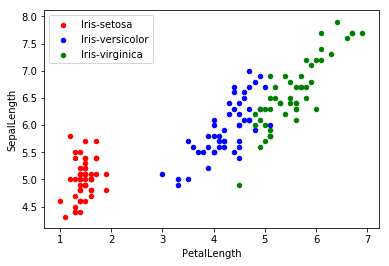

In [17]:
colors = ["red", "blue", "green"]
fig, ax = plt.subplots(1, 1)
for i, cls in enumerate(df.Species.unique()):
    df1 = df[df.Species == cls]
    df1.plot.scatter(x = "PetalLength", y = "SepalLength", 
                     color = colors[i], ax = ax, label = cls)
plt.legend()

In [57]:
X = df.loc[:, ["PetalLength","SepalLength"]].values
y = df.Species.values

In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [59]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression(C=1)
lr.fit(X_std, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = lr.predict(X_std)
pd.Series(y_pred == y).value_counts()

True     131
False     19
dtype: int64

In [46]:
X[:4, :]

array([[ 1.4,  5.1],
       [ 1.4,  4.9],
       [ 1.3,  4.7],
       [ 1.5,  4.6]])

In [63]:
pd.DataFrame(lr.predict_proba(X_std))

,0,1,2
0,0.837862,0.161410,0.000728
1,0.819579,0.179729,0.000692
2,0.808499,0.190962,0.000539
3,0.781908,0.217310,0.000782
4,0.828848,0.170442,0.000710
5,0.838949,0.159594,0.001457
6,0.790481,0.208879,0.000641
7,0.820684,0.178447,0.000869
8,0.770288,0.229105,0.000608
9,0.811282,0.187872,0.000847


In [34]:
from mlxtend.plotting import plot_decision_regions

In [40]:
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
y.dtype

dtype('int64')

In [49]:
#plot_decision_regions(X_std, y, lr)

In [51]:
y = np.linspace(-10, 10, 100)
y

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [52]:
def phi(y):
    return 1 / (1 + np.exp(-y))

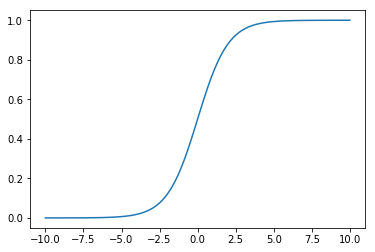

In [56]:
plt.plot(y, phi(y))

### What we want to find probability of 

### P(Species == "Verginica")

In [67]:
y_new = np.where(y == "Iris-virginica", 1, 0)

In [68]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
lr.fit(X_std, y_new)
y_probs =lr.predict_proba(X_std)[:, 1]
y_probs

array([  8.30680666e-04,   8.11655141e-04,   6.47210334e-04,
         9.60566236e-04,   8.21112847e-04,   1.58195420e-03,
         7.83930123e-04,   1.00611858e-03,   7.65974531e-04,
         9.94532072e-04,   1.05382885e-03,   1.20453332e-03,
         8.02306284e-04,   4.11483789e-04,   5.99968959e-04,
         1.09108887e-03,   7.01890842e-04,   8.30680666e-04,
         1.63785643e-03,   1.01783994e-03,   1.58195420e-03,
         1.01783994e-03,   3.47664187e-04,   1.52795706e-03,
         2.21492736e-03,   1.23275671e-03,   1.23275671e-03,
         1.02969771e-03,   8.40359877e-04,   1.19066458e-03,
         1.20453332e-03,   1.05382885e-03,   1.02969771e-03,
         8.70078891e-04,   9.94532072e-04,   5.46850424e-04,
         7.10070443e-04,   9.94532072e-04,   6.25099009e-04,
         1.01783994e-03,   6.70103267e-04,   6.32384269e-04,
         6.25099009e-04,   1.23275671e-03,   2.29314588e-03,
         8.02306284e-04,   1.24711512e-03,   7.83930123e-04,
         1.04169348e-03,

In [86]:
y_cls = np.where(y_probs > 0.3, 1, 0)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
confusion_matrix(y_new, y_cls)

array([[77, 23],
       [ 0, 50]])

In [89]:
(95 + 47) / (y.shape[0])

0.9466666666666667

In [92]:
lr.coef_

array([[ 3.57649387,  0.0956893 ]])

In [100]:
X = df.iloc[:, 0:4].values
y = LabelEncoder().fit_transform(df.Species)
lr.fit(X, y)
pd.DataFrame(lr.predict_proba(X))
accuracy_score(y, lr.predict(X))

0.95999999999999996

In [101]:
from sklearn.model_selection import train_test_split

In [109]:
X = df.iloc[:, 0:4].values
y = df.Species.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)
lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)
print("accuracy: ", lr.score(X_test, y_test))
lr.coef_

accuracy:  0.977777777778


array([[ 0.38374055,  1.32652754, -2.11104471, -0.9461098 ],
       [ 0.4320052 , -1.34725946,  0.44524639, -1.05669006],
       [-1.51794792, -1.5214025 ,  2.26045082,  2.12613204]])

In [111]:
X = df.iloc[:, 0:4].values
y = df.Species.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)
lr = LogisticRegression(C = 10)
lr.fit(X_train, y_train)
print("accuracy: ", lr.score(X_test, y_test))
lr.intercept_, lr.coef_

accuracy:  0.977777777778


(array([ 0.40077042,  3.08686723, -3.22505879]),
 array([[ 0.62940798,  2.09481136, -3.3412235 , -1.52891256],
        [ 0.31228435, -2.04734819,  0.8106231 , -1.96695329],
        [-2.49714167, -3.4797306 ,  4.13235803,  4.99377249]]))

In [113]:
X = scaler.fit_transform(df.iloc[:, 0:4].values)
y = df.Species.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)
lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)
print("accuracy: ", lr.score(X_test, y_test))

accuracy:  0.955555555556


In [114]:
X = scaler.fit_transform(df.iloc[:, 0:4].values)
y = LabelEncoder().fit_transform(df.Species.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)
lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)
print("accuracy: ", lr.score(X_test, y_test))

accuracy:  0.955555555556


In [138]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
idx = df[df.Species == "Iris-setosa"].index
df.loc[idx, "Species"] = 0
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [148]:
credit = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/credit-default.csv")
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [149]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

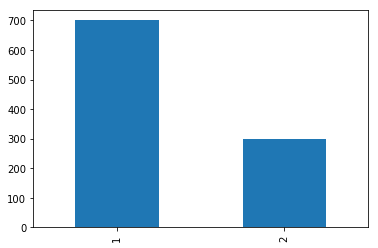

In [151]:
credit.default.value_counts().plot.bar()

In [131]:
categorical_columns = credit.select_dtypes(["O"]).columns
categorical_columns

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_length', 'personal_status', 'other_debtors', 'property',
       'installment_plan', 'housing', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [133]:
default_status = credit.default
del credit["default"]

In [134]:
credit_dummied = pd.get_dummies(credit, columns=categorical_columns, drop_first=True)
credit_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
months_loan_duration                     1000 non-null int64
amount                                   1000 non-null int64
installment_rate                         1000 non-null int64
residence_history                        1000 non-null int64
age                                      1000 non-null int64
existing_credits                         1000 non-null int64
dependents                               1000 non-null int64
checking_balance_< 0 DM                  1000 non-null uint8
checking_balance_> 200 DM                1000 non-null uint8
checking_balance_unknown                 1000 non-null uint8
credit_history_delayed                   1000 non-null uint8
credit_history_fully repaid              1000 non-null uint8
credit_history_fully repaid this bank    1000 non-null uint8
credit_history_repaid                    1000 non-null uint8
purpose_car (new)                       

In [144]:
X = scaler.fit_transform(credit_dummied.values)
y = np.where(default_status == 1.0, 1, 0)

/Users/abulbasar/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [147]:
lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7533333333333333